# 数据科学第二章
----------------------------------
## 1.一维数组
#### （1） 定义和基本操作

In [1]:
import numpy as np
names = np.array(['王伟', '小小', '祝福语', '方起问', '刘少胡'])
names

array(['王伟', '小小', '祝福语', '方起问', '刘少胡'], dtype='<U3')

In [2]:
print(names.ndim)     #数据维度
print(names.size)     #数据元素个数
print(names.dtype)    #数组元素类型

1
5
<U3


#### （2）选取元素操作

In [3]:
print(names[2], names[-1])

祝福语 刘少胡


#### （3）截取操作

In [4]:
names[[1, 2, 4]]    #抽取元素

array(['小小', '祝福语', '刘少胡'], dtype='<U3')

In [5]:
names[1:4]          #截断数组

array(['小小', '祝福语', '方起问'], dtype='<U3')

In [6]:
names[1:4:2]        #设定步长

array(['小小', '方起问'], dtype='<U3')

#### （4）条件选取操作

In [7]:
names[ (names == '王伟') | (names == '小小') ]    #设定筛选条件, 不知道为什么不能用or???

array(['王伟', '小小'], dtype='<U3')

In [8]:
mask = (names == '王伟') | (names == '小小')
print(mask)
print(names[mask])

[ True  True False False False]
['王伟' '小小']


## 2.二维数组的操作
#### （1）基本操作

In [9]:
scores = np.array([[70, 85, 77, 90, 82, 84, 89],\
                [60, 64, 80, 75, 80, 92, 90],\
                [90, 93, 88, 87, 86, 90, 91],\
                [80, 82, 91, 88, 83, 86, 80],\
                [88, 72, 78, 90, 91, 73, 80]])
print(scores.ndim, scores.size, scores.shape, scores.dtype)
# 操作：数组维度    元素总数      行数列数    元素类型

2 35 (5, 7) int32


#### （2）二维数组切片
* 切片基本知识：arr\[row , column\]，先行号取再列号取，空运用‘：’占位，可以只写行截取条件

In [10]:
scores[1, 0]     # 单元素选定

60

In [11]:
scores[[1, 3], [0, 1]]     # 先行索引值，再列索引值

array([60, 82])

In [12]:
scores[[1, 3]]          # 行选取

array([[60, 64, 80, 75, 80, 92, 90],
       [80, 82, 91, 88, 83, 86, 80]])

In [13]:
scores[:, [3, 5]]       # 列选取

array([[90, 84],
       [75, 92],
       [87, 90],
       [88, 86],
       [90, 73]])

In [14]:
scores[[0, 3], 1:4]    # 行选取 + 列截取

array([[85, 77, 90],
       [82, 91, 88]])

In [15]:
scores[[1, 3]] [:, [0, 1]]       # 某些行的某些列

array([[60, 64],
       [80, 82]])

#### （3）条件筛选
* 原理与以上相同，先行后列

In [16]:
scores[mask, :]

array([[70, 85, 77, 90, 82, 84, 89],
       [60, 64, 80, 75, 80, 92, 90]])

In [17]:
scores[ (names == '王伟') | (names == '小小'), :]

array([[70, 85, 77, 90, 82, 84, 89],
       [60, 64, 80, 75, 80, 92, 90]])

In [18]:
# 普通数组不支持条件判断

subjects = ['Chinese', 'Poem', 'Math', 'PS', 'JAVA', 'CAD', 'RSMX']
scores[ (names == '王伟') | (names == '小小') ] [: , (subjects == 'Poem') | (subjects == 'CAD')]

array([], shape=(2, 0, 7), dtype=int32)

In [19]:
subjects = np.array(['Chinese', 'Poem', 'Math', 'PS', 'JAVA', 'CAD', 'RSMX'])
scores[ (names == '王伟') | (names == '小小') ] [: , (subjects == 'Poem') | (subjects == 'CAD')]

array([[85, 84],
       [64, 92]])

#### （4）创建方法

In [20]:
np.arange(0, 11)        # 始末

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [21]:
np.arange(3, 11, 2)     # 步长

array([3, 5, 7, 9])

In [22]:
np.arange(0, 15).reshape(3, 5)     # 行数  列数

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [23]:
np.zeros((3, 4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [24]:
np.ones((4, 3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [25]:
# 玩一玩

subjects > np.array([(2 if one<0 else 'Math') for one in np.ones(subjects.shape)])

array([False,  True, False,  True, False, False,  True])

## 3.多维数组运算
#### （1）广播机制运算
* 广播机制：会将标量，低维数组转化成高维数组在进行与高维数组的运算

In [26]:
# 与标量相加
scores + 1

array([[71, 86, 78, 91, 83, 85, 90],
       [61, 65, 81, 76, 81, 93, 91],
       [91, 94, 89, 88, 87, 91, 92],
       [81, 83, 92, 89, 84, 87, 81],
       [89, 73, 79, 91, 92, 74, 81]])

In [27]:
bonus = np.array([-10, -9, -8, -7, -99, 88, 7])
scores + bonus

array([[ 60,  76,  69,  83, -17, 172,  96],
       [ 50,  55,  72,  68, -19, 180,  97],
       [ 80,  84,  80,  80, -13, 178,  98],
       [ 70,  73,  83,  81, -16, 174,  87],
       [ 78,  63,  70,  83,  -8, 161,  87]])

#### （2）元素运算

In [28]:
scores[ names == '小小', subjects == 'Poem'] += 1000
scores

array([[  70,   85,   77,   90,   82,   84,   89],
       [  60, 1064,   80,   75,   80,   92,   90],
       [  90,   93,   88,   87,   86,   90,   91],
       [  80,   82,   91,   88,   83,   86,   80],
       [  88,   72,   78,   90,   91,   73,   80]])

#### （3）函数与矩阵运算

In [29]:
np.floor(scores/10)     # 计算各个元素的floor值，即小于或等于该值的最大整数

array([[  7.,   8.,   7.,   9.,   8.,   8.,   8.],
       [  6., 106.,   8.,   7.,   8.,   9.,   9.],
       [  9.,   9.,   8.,   8.,   8.,   9.,   9.],
       [  8.,   8.,   9.,   8.,   8.,   8.,   8.],
       [  8.,   7.,   7.,   9.,   9.,   7.,   8.]])

In [30]:
np.subtract(scores, 3)     # 等价于减号

array([[  67,   82,   74,   87,   79,   81,   86],
       [  57, 1061,   77,   72,   77,   89,   87],
       [  87,   90,   85,   84,   83,   87,   88],
       [  77,   79,   88,   85,   80,   83,   77],
       [  85,   69,   75,   87,   88,   70,   77]])

In [31]:
scores.sum(axis = 0)    # 按特定方式求和
# axis = 0 按列求和
# axis = 1 按行求和

array([ 388, 1396,  414,  430,  422,  425,  430])

In [32]:
scores.sum()       # 直接求所有元素的和

3905

In [33]:
scores[names == '小小'].mean()    # 求平均值

220.14285714285714

In [34]:
# 查询最高成绩， 其中argmax函数寻找最大数的下标
names[scores[:, subjects == 'Math'].argmax() ]

'方起问'

#### （4）随机数组

In [35]:
np.random.randint(0, 6, 10)    # 生成10个数， 取值范围0~5

array([1, 4, 4, 3, 0, 3, 2, 0, 5, 1])

In [36]:
np.random.randint(0, 2, size = (5, 6))      # 随机数， 取值0，1

array([[1, 0, 1, 0, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 1],
       [1, 0, 1, 1, 1, 1]])

In [37]:
np.random.normal(0, 1, size = (4, 5))     # 服从正态分布， 均值为0， 方差为1

array([[-0.55539109, -1.06996357, -0.48183368, -0.4674807 , -0.20133865],
       [ 0.60674675,  0.90978042, -0.06976653, -1.53317462,  1.80177161],
       [ 0.76044985,  2.47150792,  0.04590991,  1.24692756,  0.72226678],
       [ 1.71904744, -1.25374697,  0.95672962, -1.06480299, -0.41317608]])

# 案例：随机游走

In [38]:
steps = 10
rndwlk = np.random.randint(0, 2, size = (2, steps))
rndwlk             # 随机二元方向组

array([[0, 0, 0, 0, 1, 1, 0, 1, 0, 1],
       [1, 0, 0, 1, 1, 1, 1, 0, 1, 1]])

In [39]:
rndwlk = np.where( rndwlk>0, 1, -1)       # 相当于？:
rndwlk

array([[-1, -1, -1, -1,  1,  1, -1,  1, -1,  1],
       [ 1, -1, -1,  1,  1,  1,  1, -1,  1,  1]])

#### 计算游走位置

In [40]:
position = rndwlk.cumsum(axis = 1)        # cumsum按行累加求和
position

array([[-1, -2, -3, -4, -3, -2, -3, -2, -3, -2],
       [ 1,  0, -1,  0,  1,  2,  3,  2,  3,  4]], dtype=int32)

#### 计算距离

In [41]:
dists = np.sqrt(position[0]**2 + position[1]**2)   # 计算平方根
dists

array([1.41421356, 2.        , 3.16227766, 4.        , 3.16227766,
       2.82842712, 4.24264069, 2.82842712, 4.24264069, 4.47213595])

In [42]:
np.set_printoptions(precision = 4)           # 保留4位小数
dists

array([1.4142, 2.    , 3.1623, 4.    , 3.1623, 2.8284, 4.2426, 2.8284,
       4.2426, 4.4721])

In [43]:
dists.max()

4.47213595499958

In [44]:
dists.min()

1.4142135623730951

In [45]:
dists.mean()

3.2353040461440385

In [46]:
# 统计物体游走过程中离原点大于平均距离的次数
(dists>dists.mean()).sum()

4

#### 绘图展示游走轨迹

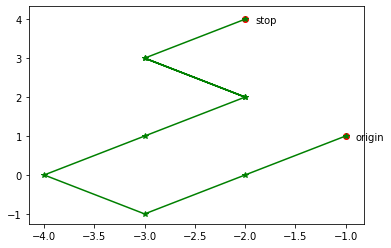

In [49]:
import matplotlib .pyplot as plt
x = position[0]
y = position[1] 

plt.plot(x, y, c='g', marker='*')           # 画折线图
plt.scatter(x[0], y[0], c='r', marker='o')  # 画起始点
plt.text(x[0]+.1, y[0]-.1, 'origin')        # 标记起始点，为了偏离一点，防止遮住
plt.scatter(x[-1], y[-1], c='r', marker='o')# 画终点
plt.text(x[-1]+.1, y[-1]-.1, 'stop')        # 标记终点
plt.show()                                  # 显示图